In [20]:
import os
import numpy as np
import scipy.io as spio
import scipy.optimize as opt
import matplotlib.pyplot as plt
from linearRegCostFunction import RegCost, gdReg, minimize
from learningCurve import learningCurve

In [2]:
#ler arquivo de dados
data = spio.loadmat('data/ex5data1.mat')
#armazena os dados de cada array identificado em [''] na sua respectiva variável a ser usada
X = np.c_[np.ones_like(data['X']), data['X']]
Xtest = np.c_[np.ones_like(data['Xtest']), data['Xtest']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]
y = data ['y']
ytest = data['ytest']
yval = data ['yval']

In [3]:
def plot (X, y):
    
    plt.axis([-50, 40, 0, 50])
    plt.scatter(X[:,1:].T, y, color='red', marker='x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot5.1.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

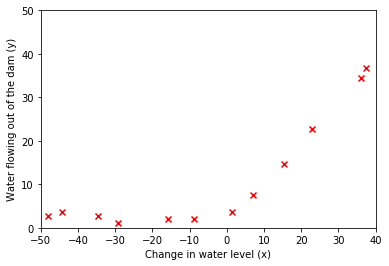

In [4]:
plot(X, y)

In [5]:
theta = np.ones((X.shape[1],1))
lamb=1
#custo encontrado
J=RegCost(theta, X, y, lamb)
print (J)

303.9931922202643


In [6]:
#valores do gradiente
gd = gdReg(theta, X, y, lamb)
print (gd)

[[-15.30301567]
 [598.25074417]]


In [7]:
theta0 = np.zeros((X.shape[1],1))
#função criada para o cálculo do valor ótimo de theta, sendo lambda = 0
custo, theta1 = minimize(theta0, X, y, 0)
print (custo, theta1)

22.378998153266522 [[12.98541793]
 [ 0.36716458]]


In [8]:
def plotlinear (X, y, theta):
    #define o range no qual a linha será plotada
    t = np.arange(-50, 40, 1)
    plt.axis([-50, 40, -5, 50])
    plt.scatter(X[:,1:].T, y, color='red', marker='x')
    #gera a linha de regressão linear
    plt.plot(t, theta[0] + (theta[1]*t), color = 'blue')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot5.4.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

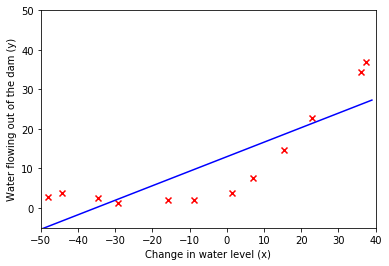

In [21]:
plotlinear(X, y, theta1)

In [19]:
erro, erro_val = learningCurve(X, y, Xval, yval, 0)

In [15]:
def ploterro(erro_val, erro):
    t = np.arange(1,13)
    plt.axis ([0, 13, 0, 150])
    plt.plot (t, erro_val,color = 'green', label = 'Cross Validation')
    plt.plot (t, erro, color = "blue", label = 'Train')
    plt.legend()
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.title('Learning Curve for Linear Regression')
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot6.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

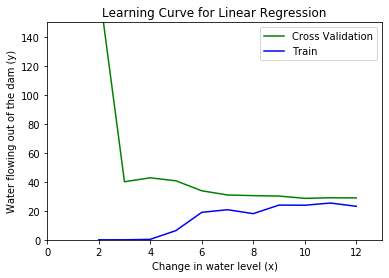

In [22]:
ploterro(erro_val, erro)